In [50]:
# Class: Computer Vision
# Homework: CV_CNN_Classifier
# programmer: Tyler Angus


## Setup
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot

from keras.models import model_from_json
from keras.models import load_model

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten


from keras.preprocessing.image import load_img
from keras.preprocessing.image import save_img
from keras.preprocessing.image import img_to_array





In [2]:
## Prepare the data






def data_prep(num_classes, data_set_size):

    (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

    x_train = x_train[0:int(x_train.shape[0] * data_set_size)]

    # Scale images to the [0, 1] range
    x_train = x_train.astype("float32") / 255
    x_test = x_test.astype("float32") / 255

    # Make sure images have shape defined by input_shape
    x_train = np.expand_dims(x_train, -1)
    x_test = np.expand_dims(x_test, -1)
    print("x_train shape:", x_train.shape)
    print("x_test shape:", x_test.shape)

    # convert class vectors to binary class matrices
    y_train = keras.utils.to_categorical(y_train, num_classes)
    y_test = keras.utils.to_categorical(y_test, num_classes)

    return x_train, y_train, x_test, y_test






In [3]:


def define_model_base(input_shape):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu',input_shape=input_shape, padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    
    return model
              

In [4]:
def define_model_smallVGG(input_shape):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu',input_shape=input_shape, padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, kernel_size=(3, 3), activation="relu", padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    
    return model

In [5]:
## Train the model
def model_train(batch_size, epochs, model, x_train, y_train):

    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
    return history, model
    

In [6]:
def summarize_diagnostics(histories):
	for i in range(len(histories)):
		# plot loss
		pyplot.subplot(2, 1, 1)
		pyplot.title('Cross Entropy Loss')
		pyplot.xlabel('Training Epochs')
		pyplot.plot(histories[i].history['loss'], color='blue', label='train')
		pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
		# plot accuracy
		pyplot.tight_layout(pad=2)
		pyplot.subplot(2, 1, 2)
		pyplot.title('Classification Accuracy')
		pyplot.xlabel('Training Epochs')
		pyplot.plot(histories[i].history['accuracy'], color='blue', label='train')
		pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='test')
	pyplot.show()

In [7]:

# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)
batch_size = 128
epochs = 10
model_batches = []

data_set_size = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]


for index, i in enumerate(data_set_size):

    print('\n\n\n\n Using a data batch ', i*100, '% the size of the base model.')
    print('The model summary and training are below: \n')
    x_train, y_train, x_test, y_test = data_prep(num_classes, data_set_size[index])
    model = define_model_base(input_shape)
    model.summary()
    history, model = model_train(batch_size, epochs, model, x_train, y_train)
    model.save(str(int(i*100)))



    



___________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               313700    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1010      
Total params: 333,526
Trainable params: 333,526
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
169/169 [==============================] - 3s 20ms/step - loss: 0.4059 - accuracy: 0.8808 - val_loss: 0.1

In [14]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)
batch_size = 128
epochs = 10

x_train, y_train, x_test, y_test = data_prep(num_classes, 1)
model = define_model_smallVGG(input_shape)
model.summary()
history, model = model_train(batch_size, epochs, model, x_train, y_train)
model.save('smallVGG')


x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 3, 3, 128)         0         
____________________________________________________

In [11]:
accuracy_scores = []
loss_scores = []

## Evaluate the trained model
for index, i in enumerate(data_set_size):
    model_batches.append(load_model(str(int(i*100))))
    score = model_batches[index].evaluate(x_test, y_test, verbose=0)

    print('\n\n Using a data batch ', i*100, '% the size of the base model.')
    print('The Evaluation is below: \n')
    print("Test loss:", score[0])
    print("Test accuracy:", score[1])

    accuracy_scores.append(score[1])
    loss_scores.append(score[0])





 Using a data batch  10.0 % the size of the base model.
The Evaluation is below: 

Test loss: 0.08157937973737717
Test accuracy: 0.9753999710083008


 Using a data batch  20.0 % the size of the base model.
The Evaluation is below: 

Test loss: 0.065723717212677
Test accuracy: 0.9807000160217285


 Using a data batch  30.0 % the size of the base model.
The Evaluation is below: 

Test loss: 0.046025294810533524
Test accuracy: 0.98580002784729


 Using a data batch  40.0 % the size of the base model.
The Evaluation is below: 

Test loss: 0.05274048447608948
Test accuracy: 0.984499990940094


 Using a data batch  50.0 % the size of the base model.
The Evaluation is below: 

Test loss: 0.03888873755931854
Test accuracy: 0.9879000186920166


 Using a data batch  60.0 % the size of the base model.
The Evaluation is below: 

Test loss: 0.039326198399066925
Test accuracy: 0.9883999824523926


 Using a data batch  70.0 % the size of the base model.
The Evaluation is below: 

Test loss: 0.03335

In [25]:
accuracy_scores_smallVGG = []
loss_scores_smallVGG = []

## Evaluate the trained model
smallVGG_model = load_model('smallVGG')
score = smallVGG_model.evaluate(x_test, y_test, verbose=0)

print('The Evaluation is below: \n')
print("Test loss for smallVGG:\t\t", score[0])
print("Test accuracy for smallVGG:\t", score[1])

accuracy_scores_smallVGG.append(score[1])
loss_scores_smallVGG.append(score[0])

print('The Evaluation is below: \n')
print("Test loss for the base model:\t\t", loss_scores[9])
print("Test accuracy for the base model:\t", accuracy_scores[9])



The Evaluation is below: 

Test loss for smallVGG:		 0.033418960869312286
Test accuracy for smallVGG:	 0.9912999868392944
The Evaluation is below: 

Test loss for the base model:		 0.031282130628824234
Test accuracy for the base model:	 0.9904999732971191


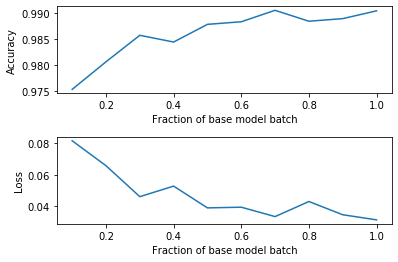

In [26]:
#plot the results 

fig, (ax1, ax2) = plt.subplots(2,1)
fig.subplots_adjust(hspace=0.5)

ax1.plot(data_set_size, accuracy_scores)
ax1.set_xlabel('Fraction of base model batch')
ax1.set_ylabel('Accuracy')

ax2.plot(data_set_size, loss_scores)
ax2.set_xlabel('Fraction of base model batch')
ax2.set_ylabel('Loss')

plt.show()

In [ ]:
# We can see that the accuracy goes up quickly with more samples but quickly tapers off. 

In [34]:
base_model = load_model('100')
predict_results_base = base_model.predict_classes(x_test) 
print(x_test.shape)
print(predict_results_base)

predict_results_smallVGG = smallVGG_model.predict_classes(x_test)
print(x_test.shape)
print(predict_results_smallVGG)

(10000, 28, 28, 1)
[7 2 1 ... 4 5 6]
(10000, 28, 28, 1)
[7 2 1 ... 4 5 6]


In [37]:
for index in range(20):
    print (predict_results_base[index], np.argmax(y_test[index], axis=-1))

print('\n')

for index in range(20):
    print (predict_results_smallVGG[index], np.argmax(y_test[index], axis=-1))

7 7
2 2
1 1
0 0
4 4
1 1
4 4
9 9
5 5
9 9
0 0
6 6
9 9
0 0
1 1
5 5
9 9
7 7
5 3
4 4


7 7
2 2
1 1
0 0
4 4
1 1
4 4
9 9
5 5
9 9
0 0
6 6
9 9
0 0
1 1
5 5
9 9
7 7
8 3
4 4


(28, 28, 1)


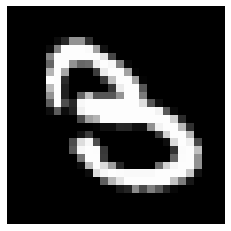

In [38]:
#printing out 20 results from the prediction we can see that the base model and the smallVGG model are prdicting the same except for when the 3 shows up towards the bottom. The base model predicts this as a 5 and the smallVGG predicts this as a 

#display the 3 below
one_test = np.array(x_test[18])
print (one_test.shape)

plt.imshow(one_test[:,:,0],cmap=pyplot.get_cmap('gray'))
plt.axis('off')
plt.show()

In [53]:
# looking at the image I can see why the models have a hard time with this particular number. It looks similiar to an 8. 
print(y_test[1])

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


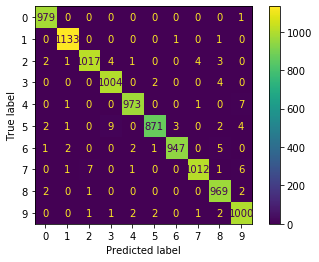

In [54]:
# create the confusion matrix for the base model

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_test_round = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test_round, predict_results_base)

cm_display = ConfusionMatrixDisplay(cm).plot()

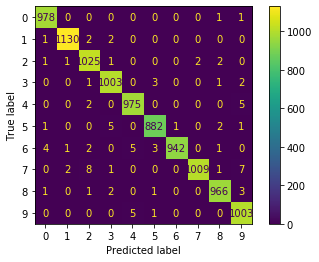

In [56]:
# create the confusion matrix for the smallVGG model

y_test_round = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test_round, predict_results_smallVGG)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [ ]:
# The above images show the prediction matricies in a interesting way that I find easier to visualize. I found this example online at  
# https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_display_object_visualization.html#sphx-glr-auto-examples-miscellaneous-plot-display-object-visualization-py 

#you can 5 is on of the harder numbers to predict in both matricies.


In [63]:
#create the classification report for the base model

from sklearn.metrics import classification_report

print(classification_report(y_test_round, predict_results_base))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.98      0.99      0.99       974
           9       0.98      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [62]:
#create the classification report for the smallVGG model

print(classification_report(y_test_round, predict_results_smallVGG))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       1.00      0.98      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.98      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

